**Creates a hidden folder named , Copies your kaggle.json file , Sets permissions so only you can read the kaggle.json**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

It will create a .zip file in your current folder

In [2]:
! kaggle datasets download -d osmi/mental-health-in-tech-survey

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0
  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 192MB/s]


This command extracts (unzips) the downloaded zip file so you can access the CSV file inside it for your analysis.

In [3]:
!unzip /content/mental-health-in-tech-survey.zip

Archive:  /content/mental-health-in-tech-survey.zip
  inflating: survey.csv              


**"We imported essential libraries like pandas, NumPy, seaborn, and matplotlib to efficiently handle data, perform analysis, and create insightful visualizations throughout the project."**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loads the dataset into Python for analysis.**

In [5]:
df = pd.read_csv("survey.csv")

**This line prints how many rows and columns are in the dataset — helping us understand the size of the data.**

In [6]:
print("Shape of data:", df.shape)

Shape of data: (1259, 27)


**Removes unnecessary columns from the dataset to keep only useful data.**
**Shows the first 5 rows of the dataset to quickly view what the data looks like**

In [7]:
df = df.drop(columns=["Timestamp", "comments", "state"])
df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Shows DataFrame summary: columns, types, non-null counts.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

**Counts missing (null) values in each DataFrame column.**

In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0
remote_work,0
tech_company,0


**Fills missing values in self_employed with "No" and in work_interfere with "Don't know".**

In [10]:
df["self_employed"] = df["self_employed"].fillna("No")
df["work_interfere"] = df["work_interfere"].fillna("Don't know")

**Shows full summary statistics of all columns, transposed.**

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1259.0,NaN,NaN,NaN,79428148.311358,2818299442.981952,-1726.0,27.0,31.0,36.0,99999999999.0
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1259,2,No,1113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,1259,5,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_employees,1259,6,6-25,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_work,1259,2,No,883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tech_company,1259,2,Yes,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Standardizes gender entries to 'male', 'female', or 'other'.

In [12]:
df['Gender'] = df['Gender'].str.lower()

df['Gender'] = df['Gender'].replace({
    'm': 'male', 'male': 'male', 'man': 'male', 'cis male': 'male',
    'f': 'female', 'female': 'female', 'woman': 'female', 'cis female': 'female',
    'trans-female': 'other', 'trans male': 'other', 'non-binary': 'other',
    'genderqueer': 'other', 'agender': 'other', 'gender fluid': 'other',
    'something else': 'other', 'other': 'other'
})

df['Gender'] = df['Gender'].apply(lambda x: x if x in ['male', 'female', 'other'] else 'other')


**Plots a bar chart showing the count of each gender in the DataFrame.**

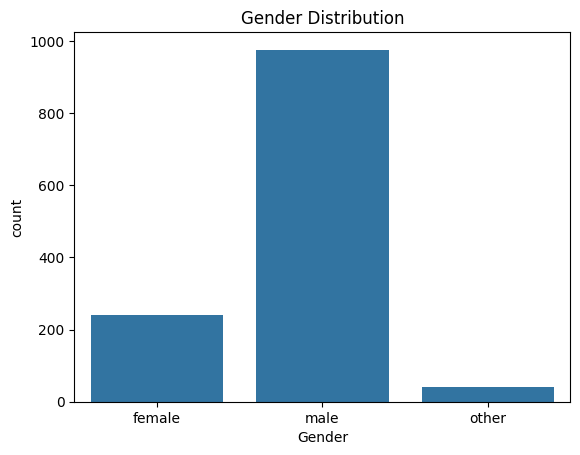

In [13]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

**Plots a bar chart of how many people did or didn't seek mental health treatment.**

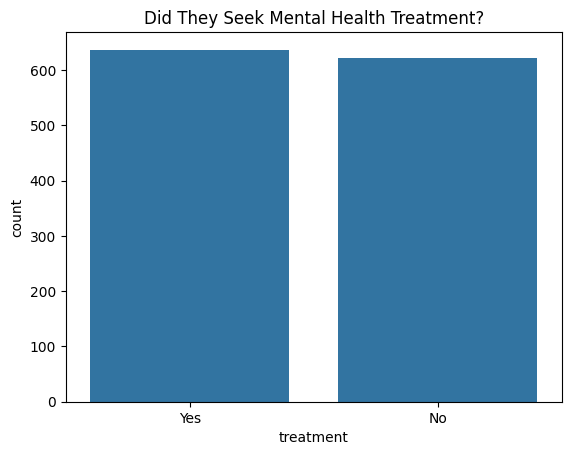

In [14]:
sns.countplot(x='treatment', data=df)
plt.title("Did They Seek Mental Health Treatment?")
plt.show()

**Plots gender-wise comparison of those who did or didn’t seek treatment.**

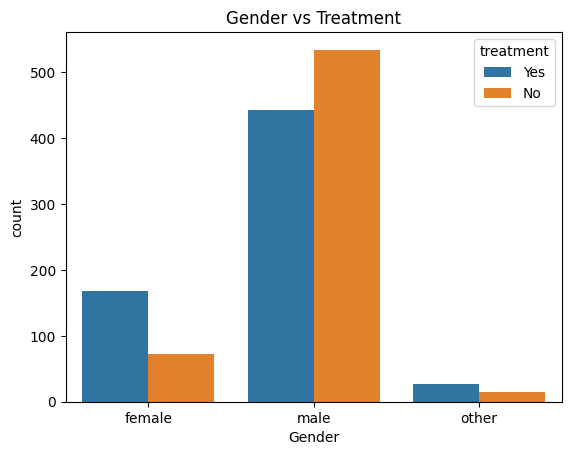

In [15]:
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title("Gender vs Treatment")
plt.show()

**Plots how work interference levels relate to seeking treatment, with rotated x-axis labels.**

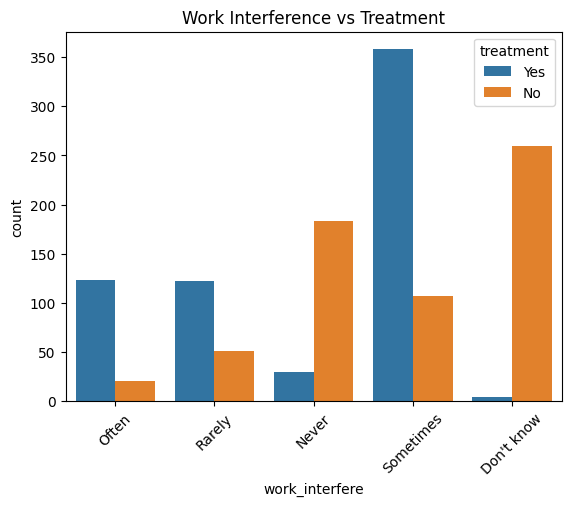

In [16]:
sns.countplot(x='work_interfere', hue='treatment', data=df)
plt.title("Work Interference vs Treatment")
plt.xticks(rotation=45)
plt.show()

**Plots treatment counts grouped by remote work status.**

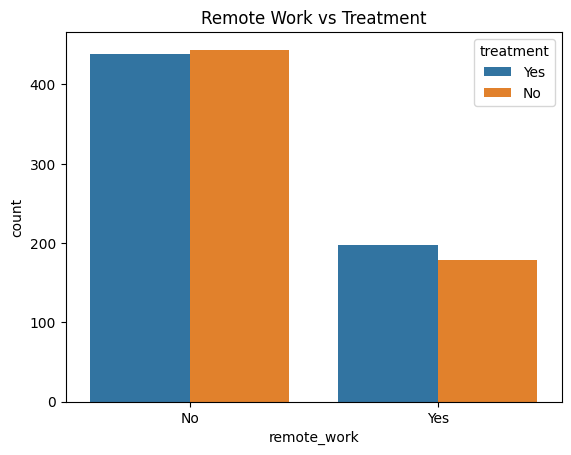

In [17]:
sns.countplot(x='remote_work', hue='treatment', data=df)
plt.title("Remote Work vs Treatment")
plt.show()

**Plots treatment counts by company size, with rotated x-axis labels.**

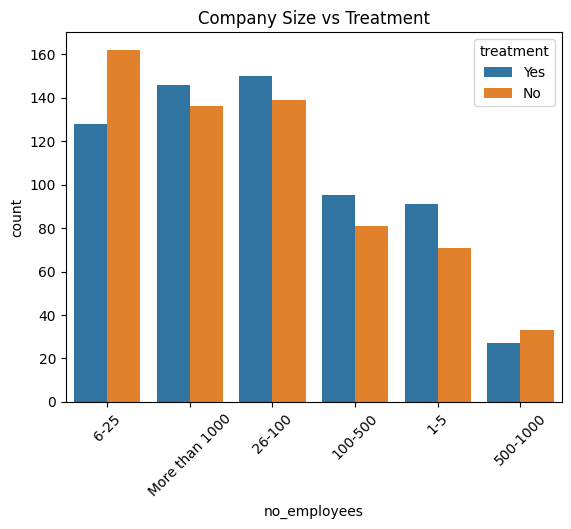

In [18]:
sns.countplot(x='no_employees', hue='treatment', data=df)
plt.title("Company Size vs Treatment")
plt.xticks(rotation=45)
plt.show()

**Plots age distribution with a histogram and a KDE curve.**

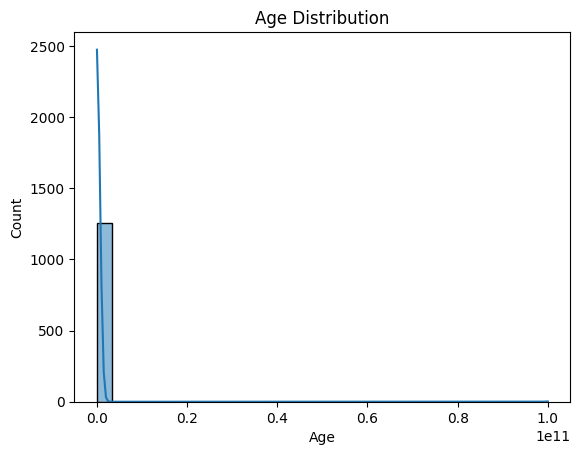

In [19]:
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

**Creates age groups by binning ages into labeled categories.**

In [20]:
df["age_group"] = pd.cut(df["Age"], bins=[0, 20, 30, 40, 50, 100],
                         labels=["<20", "21-30", "31-40", "41-50", "50+"])

**Plots treatment counts across different age groups.**

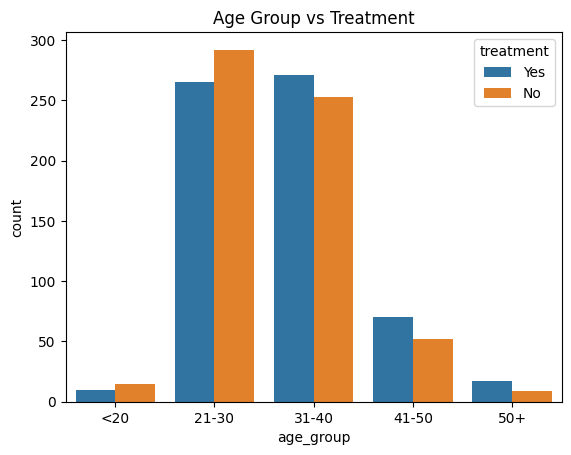

In [21]:
sns.countplot(x="age_group", hue="treatment", data=df)
plt.title("Age Group vs Treatment")
plt.show()

**Displays a pie chart showing percentage of people who sought treatment vs those who didn’t.**

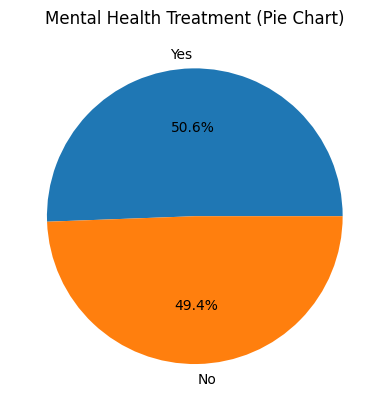

In [22]:
df['treatment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Mental Health Treatment (Pie Chart)")
plt.ylabel("")
plt.show()

In [23]:
print("""
 Insights:
- Most people in the survey are males.
- Many employees experience work interference due to mental health.
- People working remotely or in small companies are slightly more likely to seek help.
- Younger age groups (20–40) are more likely to seek treatment.

 This data shows the importance of mental health support in tech workplaces.
""")



 Insights:
- Most people in the survey are males.
- Many employees experience work interference due to mental health.
- People working remotely or in small companies are slightly more likely to seek help.
- Younger age groups (20–40) are more likely to seek treatment.

 This data shows the importance of mental health support in tech workplaces.

